In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
image.shape


(744, 500, 3)

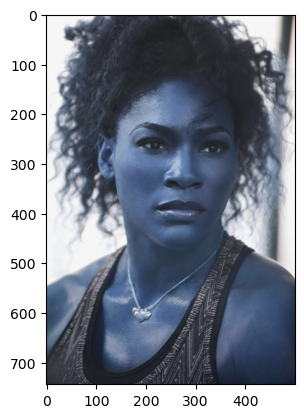

In [5]:
plt.imshow(image)

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(744, 500)

In [7]:
gray

array([[246, 246, 246, ..., 130, 156, 171],
       [246, 246, 246, ..., 135, 161, 176],
       [246, 246, 246, ..., 141, 166, 180],
       ...,
       [ 44,  44,  45, ...,  34,  34,  34],
       [ 43,  44,  44, ...,  34,  34,  34],
       [ 43,  43,  44, ...,  35,  35,  35]], dtype=uint8)

array([[246, 246, 246, ..., 130, 156, 171],
       [246, 246, 246, ..., 135, 161, 176],
       [246, 246, 246, ..., 141, 166, 180],
       ...,
       [ 44,  44,  45, ...,  34,  34,  34],
       [ 43,  44,  44, ...,  34,  34,  34],
       [ 43,  43,  44, ...,  35,  35,  35]], dtype=uint8)

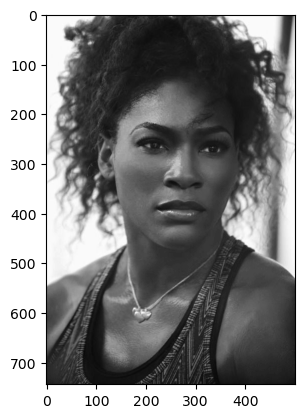

In [8]:
#observing the gray image 
plt.imshow(gray, cmap='gray')
gray

In [9]:
#identifying the position of face 
face_cascade = cv2.CascadeClassifier('C:\\Users\\AJINKYA\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\AJINKYA\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces 
#print(*faces)

#cv2.imshow("gray", gray)
#cv2.waitKey(0)

array([[102, 135, 329, 329]])

#Check
img = cv2.imread('C:\\Users\\AJINKYA\\Desktop\\13_Self_Projects\\Model\\test_images\\mariatest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(*faces)

for(x, y, w, h) in faces:
    cv2.rectangle(img(x,y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.imshow("img", img)
cv2.waitKey(0)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(102, 135, 329, 329)

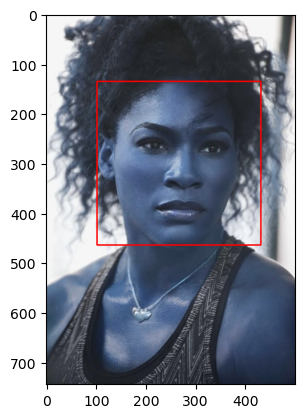

In [11]:
#Face detection 
face_image = cv2.rectangle(image,(x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_image)

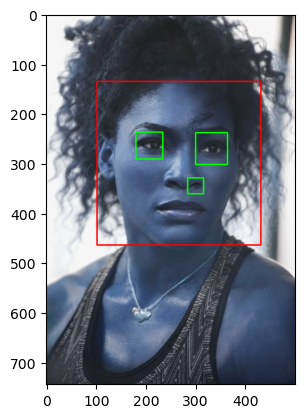

In [12]:
cv2.destroyAllWindows()

for(x,y,w,h) in faces:
    face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_image, cmap='gray')
plt.show()
    

2) Preprocessing: Crop the facial region of the image

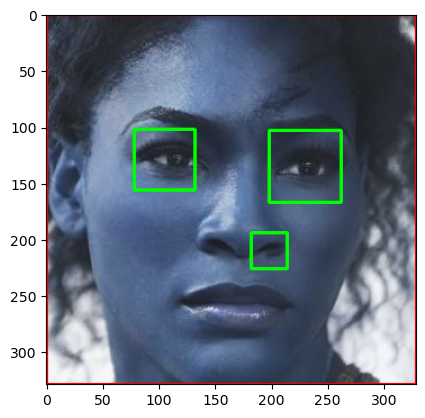

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
cropped_img = np.array(roi_color)
cropped_img.shape

(329, 329, 3)

3) Preprocessing: Use wavelet transform as a feature for trainign our model 
    
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc. 


WAVELET TRANSFORM:  It is done to extract essential features of face

In [15]:
import numpy as np 
import pywt
import cv2

def w2d(image, mode='haar', level = 1):
    imArray = image
    
    #Datatype conversion
    #convert to grayscale
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    #convert to float 
    imArray = np.float32(imArray)
    imArray /= 255;
    
    #compute coefficients
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction 
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

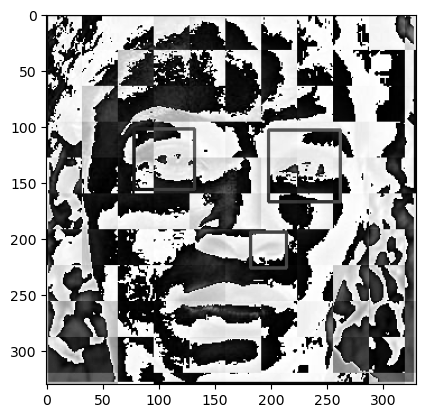

In [17]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

3)Preprocessing: Load image, detect face. If eyes >=2, then save and crop the region 
    Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)
    

In [53]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        

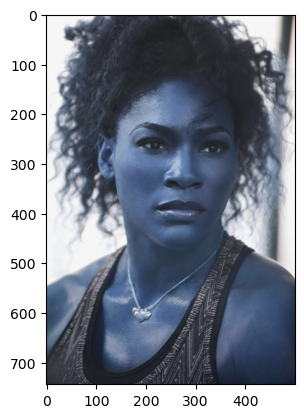

In [54]:
original_image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
plt.imshow(original_image)

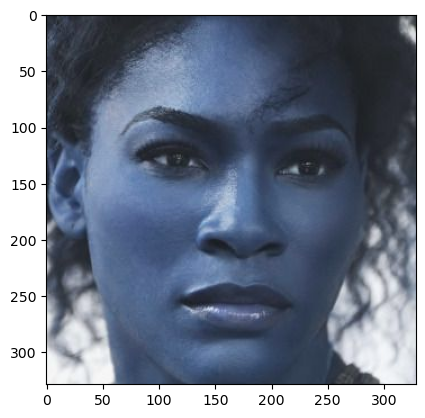

In [55]:
cropped_image = get_cropped_image_if_2_eyes('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
plt.imshow(cropped_image)

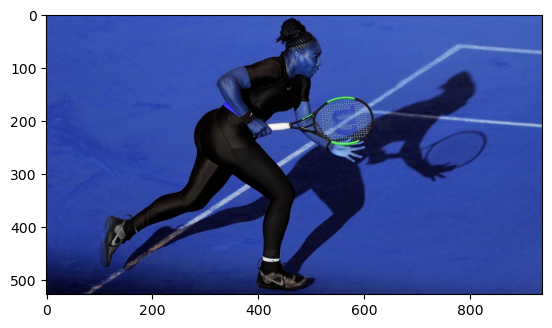

In [50]:
obstructed_image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatestsecond.jpg')
plt.imshow(obstructed_image)

In [63]:
cr_image_if = get_cropped_image_if_2_eyes('./Desktop/SelfProjects/Model/testimages/serenatestsecond.jpg')
cr_image_if

#output did not come as image is obstructed

In [64]:
path_to_data = "./Desktop/SelfProjects/Model/dataset/"
path_to_cr_data = "./Desktop/SelfProjects/Model/dataset/cropped/"

In [65]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    


In [66]:
img_dirs

['./Desktop/SelfProjects/Model/dataset/lionel_messi',
 './Desktop/SelfProjects/Model/dataset/maria_sharapova',
 './Desktop/SelfProjects/Model/dataset/roger_federer',
 './Desktop/SelfProjects/Model/dataset/serena_williams',
 './Desktop/SelfProjects/Model/dataset/virat_kohli']

After this we need to go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code. 

In [67]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [68]:
cropped_image_dirs = []

celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
                
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            
            
            
            

lionel_messi
Generating cropped images in folder: ./Desktop/SelfProjects/Model/dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder: ./Desktop/SelfProjects/Model/dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder: ./Desktop/SelfProjects/Model/dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder: ./Desktop/SelfProjects/Model/dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder: ./Desktop/SelfProjects/Model/dataset/cropped/virat_kohli


#After this manual cleaning of dataset is done as dataset is small 


#Vertical stacking of original image and wavelet transformed images

In [70]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi1.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi10.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi11.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi13.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi14.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi15.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi16.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi17.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi18.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi19.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_messi2.png',
  './Desktop/SelfProjects/Model/dataset/cropped/lionel_messi\\lionel_mess

In [71]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [81]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [73]:
32*32*3 + 32*32

4096

In [74]:
len(X[0])


4096

In [75]:
len(X)

156

In [82]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

#to avoid any error we are converting values into float

(156, 4096)

In [83]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

Data cleaning process is done. X and Y are ready. After this Model Trainig will start.

We will use SVM with rbf kernel tuned with heuristic finetuning.  

Model training using SVM


In [84]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)



0.8717948717948718

In [88]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.89      0.89      0.89         9
           2       0.71      1.00      0.83         5
           3       0.78      0.88      0.82         8
           4       1.00      0.89      0.94         9

    accuracy                           0.87        39
   macro avg       0.88      0.88      0.87        39
weighted avg       0.89      0.87      0.87        39



In [89]:
len(X_test)

39

GRIDSEARCHCV to try out different models with different parameters. Goal is to come up with best model with best fine tuned parameters. GSCV is used to hypertune parameters. 

In [90]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Here  onwards we are going to define different candidate models i.e. 

In [91]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf', 'linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
   
}

In [93]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.846014,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.649638,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.846014,{'logisticregression__C': 1}


In [94]:
best_estimators #it is actually a trianed model 

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [95]:
best_estimators['svm'].score(X_test, y_test)

0.9230769230769231

In [96]:
best_estimators['random_forest'].score(X_test, y_test)

0.6923076923076923

In [98]:
best_estimators['logistic_regression'].score(X_test, y_test)


0.8461538461538461

In [99]:
best_clf = best_estimators['svm']

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0, 1, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 1, 7, 0],
       [0, 1, 0, 0, 8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

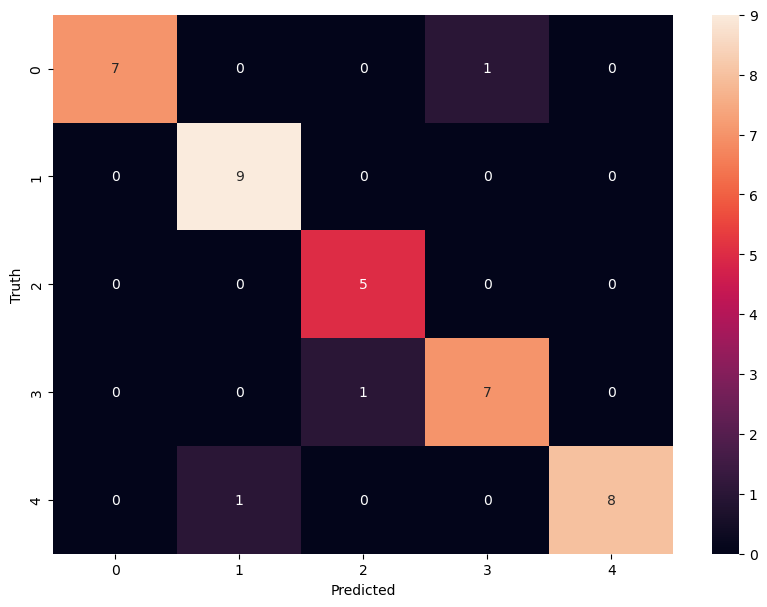

In [101]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

Now we will save the trained model

In [103]:
!pip install joblib


In [104]:
import joblib
#save the model as a pickle in a file

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

We will also save the class dictionary 

In [106]:
import json 
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))